# Problem Statement 
### Building a Multiple linear Regression Model to predict the demand of Shared bike with in a region 
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To address these challenges and prepare for a post-lockdown recovery, the company aims to create a strategic business plan to accelerate revenue growth as the economy improves. They are particularly interested in understanding the factors influencing the demand for shared bikes in the American market after quarantine restrictions end.

 - BoomBikes has hired a consulting firm to analyze a dataset that includes daily bike demand data, considering various factors such as weather conditions and user behavior. The company seeks to identify which variables significantly impact bike demand and how well these factors explain the fluctuations in usage. The insights gained from this analysis will help BoomBikes better cater to customer needs, differentiate itself from competitors, and achieve profitability.

___Importing the required Library___


In [3]:
# For Data managment and Adjustment
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data and Time 
from datetime import datetime as dt 

# To Prevent copy error for being seen 
import warnings
warnings.filterwarnings('ignore')

# For building a Model and Predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

### ___Step 1 : Reading Data___

In [5]:
bikes = pd.read_csv('day.csv', index_col =0)

In [6]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikes.shape

(730, 15)

In [8]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [10]:
bikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### ___Segmenting the data for easy Handeling___

___Date Time Variables___

In [13]:
# Remove unnecessary date column
bikes.drop('dteday', axis = 1, inplace = True)

___Categorical Variables___

In [15]:
cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']
bikes[cat_columns].nunique()

mnth          12
season         4
yr             2
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [16]:
bikes[cat_columns] = bikes[cat_columns].astype('category')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 52.0 KB


___Numerical Variables___

In [18]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

In [19]:
bikes[num_columns].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### ___Step 2 : Vizualizing the Data___

- Numerical Data Visualization with scatter Plot 

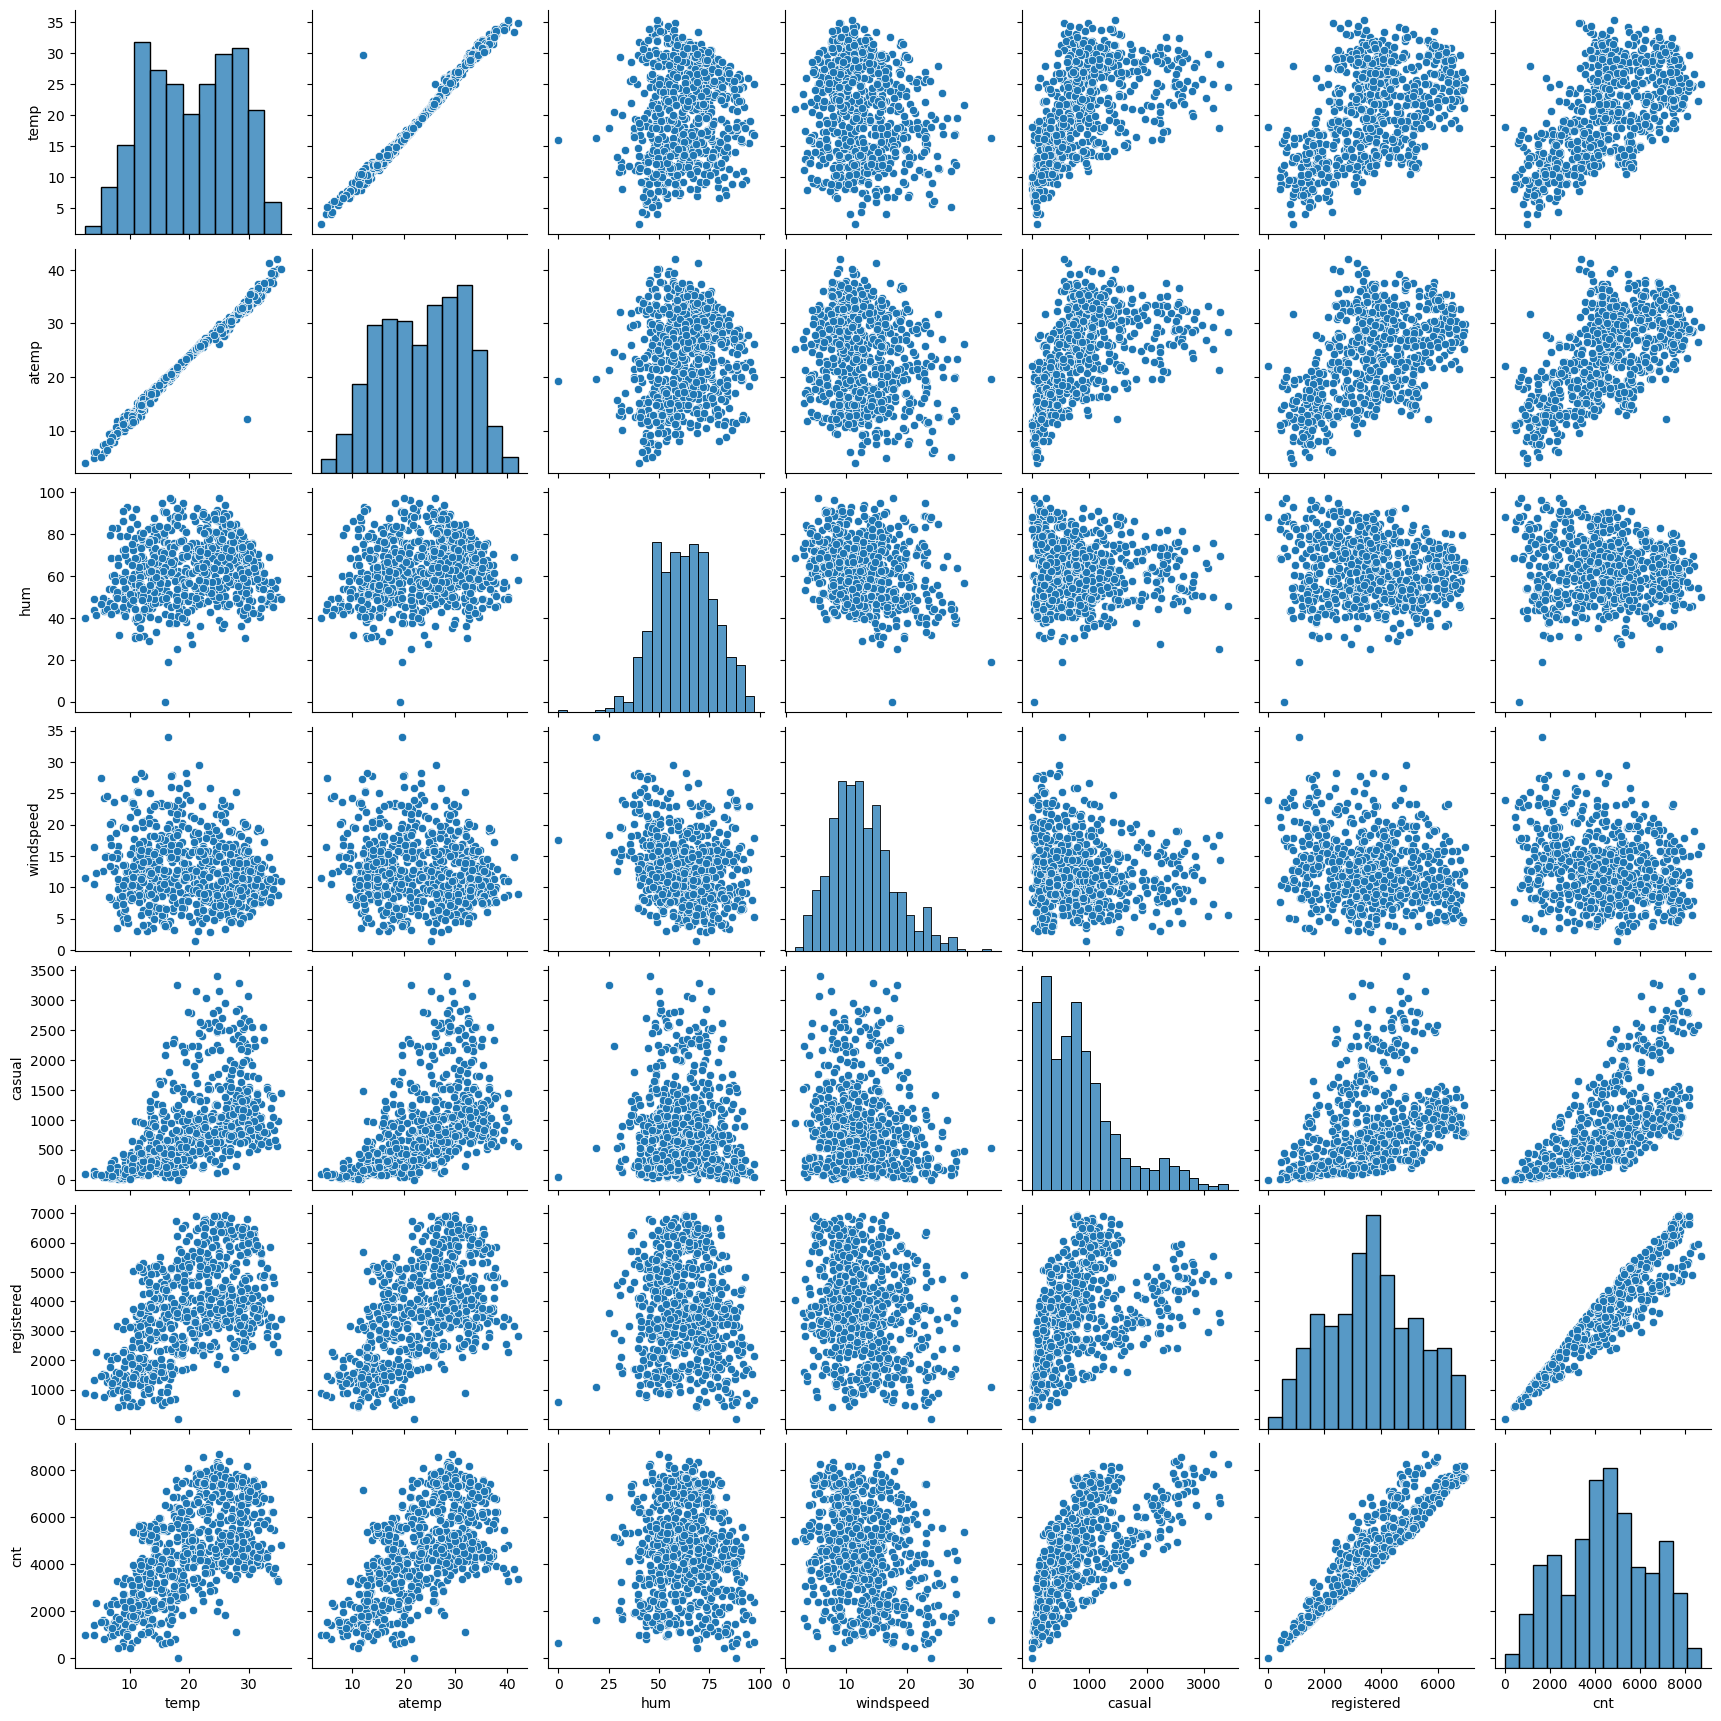

In [22]:
sns.pairplot(bikes[num_columns])
plt.show()

- For Categorical Variables Boxplot

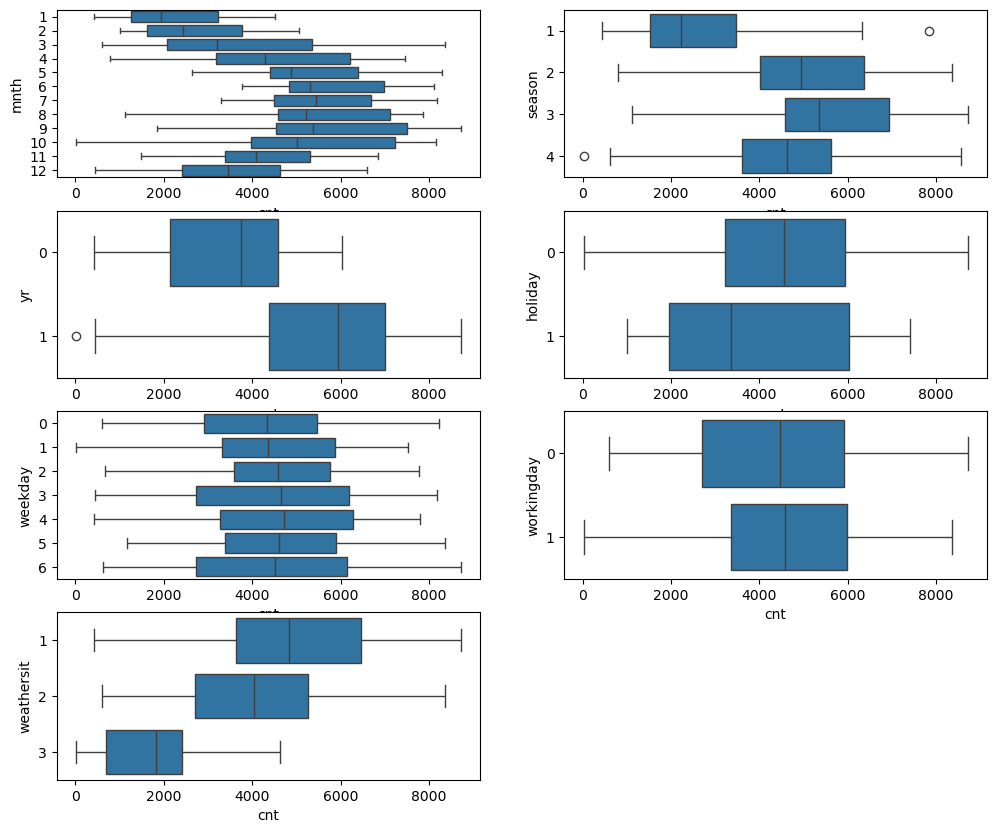

In [24]:
#cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x='cnt', y=col)
plt.show()

In [25]:
# Weekday:
# There seems to be some variation in the median count across different weekdays, but it's less pronounced.
# Weekday could still be included in the model, but it may have a weaker predictive power compared to other features.

# For the regression model:
# Categorical variables like season, weathersit, month, weekday, etc., should be one-hot encoded or treated as categorical variables.
# Interaction terms (such as season:workingday) might also be worth exploring.

### ___Step 3 : Preparing the data for modeling___

#### ___Dummy Variable___

In [28]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [30]:
# Generating Dummy Variable
# Dropping the first one leaves just one column for it, reducing multicollinearity.
bikes_dummies  = pd.get_dummies(bikes[cat_columns], drop_first = True).astype(int) 

In [31]:
bikes_dummies_col = bikes_dummies.columns
bikes_dummies[bikes_dummies_col].nunique()

mnth_2          2
mnth_3          2
mnth_4          2
mnth_5          2
mnth_6          2
mnth_7          2
mnth_8          2
mnth_9          2
mnth_10         2
mnth_11         2
mnth_12         2
season_2        2
season_3        2
season_4        2
yr_1            2
holiday_1       2
weekday_1       2
weekday_2       2
weekday_3       2
weekday_4       2
weekday_5       2
weekday_6       2
workingday_1    2
weathersit_2    2
weathersit_3    2
dtype: int64

In [32]:
bikes = pd.concat([bikes,bikes_dummies], axis = 1 ) # Concating the dataframes 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,1,0
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,1,0,0


In [33]:
# Dropping the Features from which we have obtained the Dummy Variable 
bikes.drop(cat_columns, axis = 1, inplace = True)

In [34]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   casual        730 non-null    int64  
 5   registered    730 non-null    int64  
 6   cnt           730 non-null    int64  
 7   mnth_2        730 non-null    int32  
 8   mnth_3        730 non-null    int32  
 9   mnth_4        730 non-null    int32  
 10  mnth_5        730 non-null    int32  
 11  mnth_6        730 non-null    int32  
 12  mnth_7        730 non-null    int32  
 13  mnth_8        730 non-null    int32  
 14  mnth_9        730 non-null    int32  
 15  mnth_10       730 non-null    int32  
 16  mnth_11       730 non-null    int32  
 17  mnth_12       730 non-null    int32  
 18  season_2      730 non-null    int32

#### ___Spliting data Set into Train Test Split___

In [36]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


#### ___Scaling with Min Max Scaling___

In [38]:
### Scaling with Min Max Scaling 
scaler = MinMaxScaler()

In [39]:
df_train[num_columns].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
654,19.201653,23.0423,55.8333,12.208807,922,6612,7534
577,29.246653,33.1448,70.4167,11.083475,968,6248,7216
427,16.980847,20.6746,62.1250,10.792293,956,3110,4066
729,10.489153,11.5850,48.3333,23.500518,364,1432,1796
483,15.443347,18.8752,48.9583,8.708325,1120,3100,4220


In [40]:
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train[num_columns].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
654,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
577,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
427,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
729,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
483,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


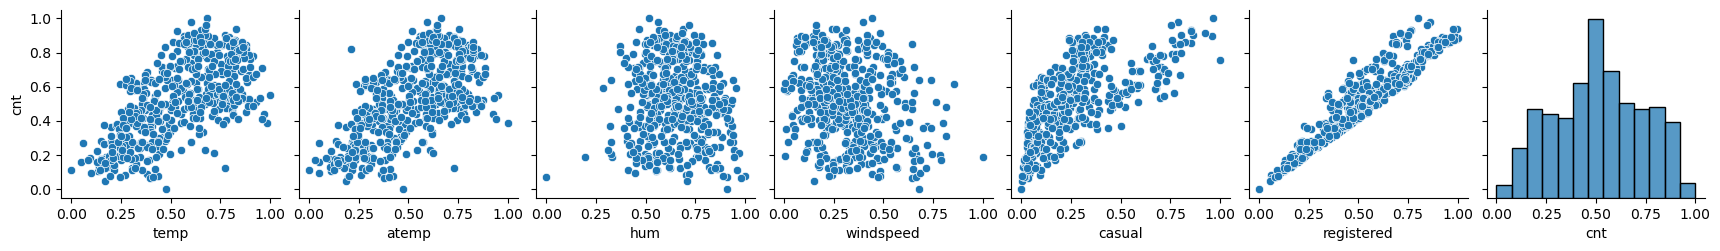

In [41]:
sns.pairplot(df_train, x_vars = num_columns,  y_vars = 'cnt')
plt.show()

# Focusing on the x-axis, we observe that the variables fall within the range of 0 to 1. 
# However, the graphs display a similar structure across different variables. 
# Both humidity and wind speed do not exhibit a strong linear relationship. 
# Although we can fit a line, the predictive power may not be very strong.

#### ___Seperating X_term and y_term___

In [43]:
y_train = bikes.pop('cnt')
X_train = bikes

In [44]:
print(X_train.shape)
print(y_train.shape)

(730, 31)
(730,)


#### ___Visualizing the correlation using a heat map.___

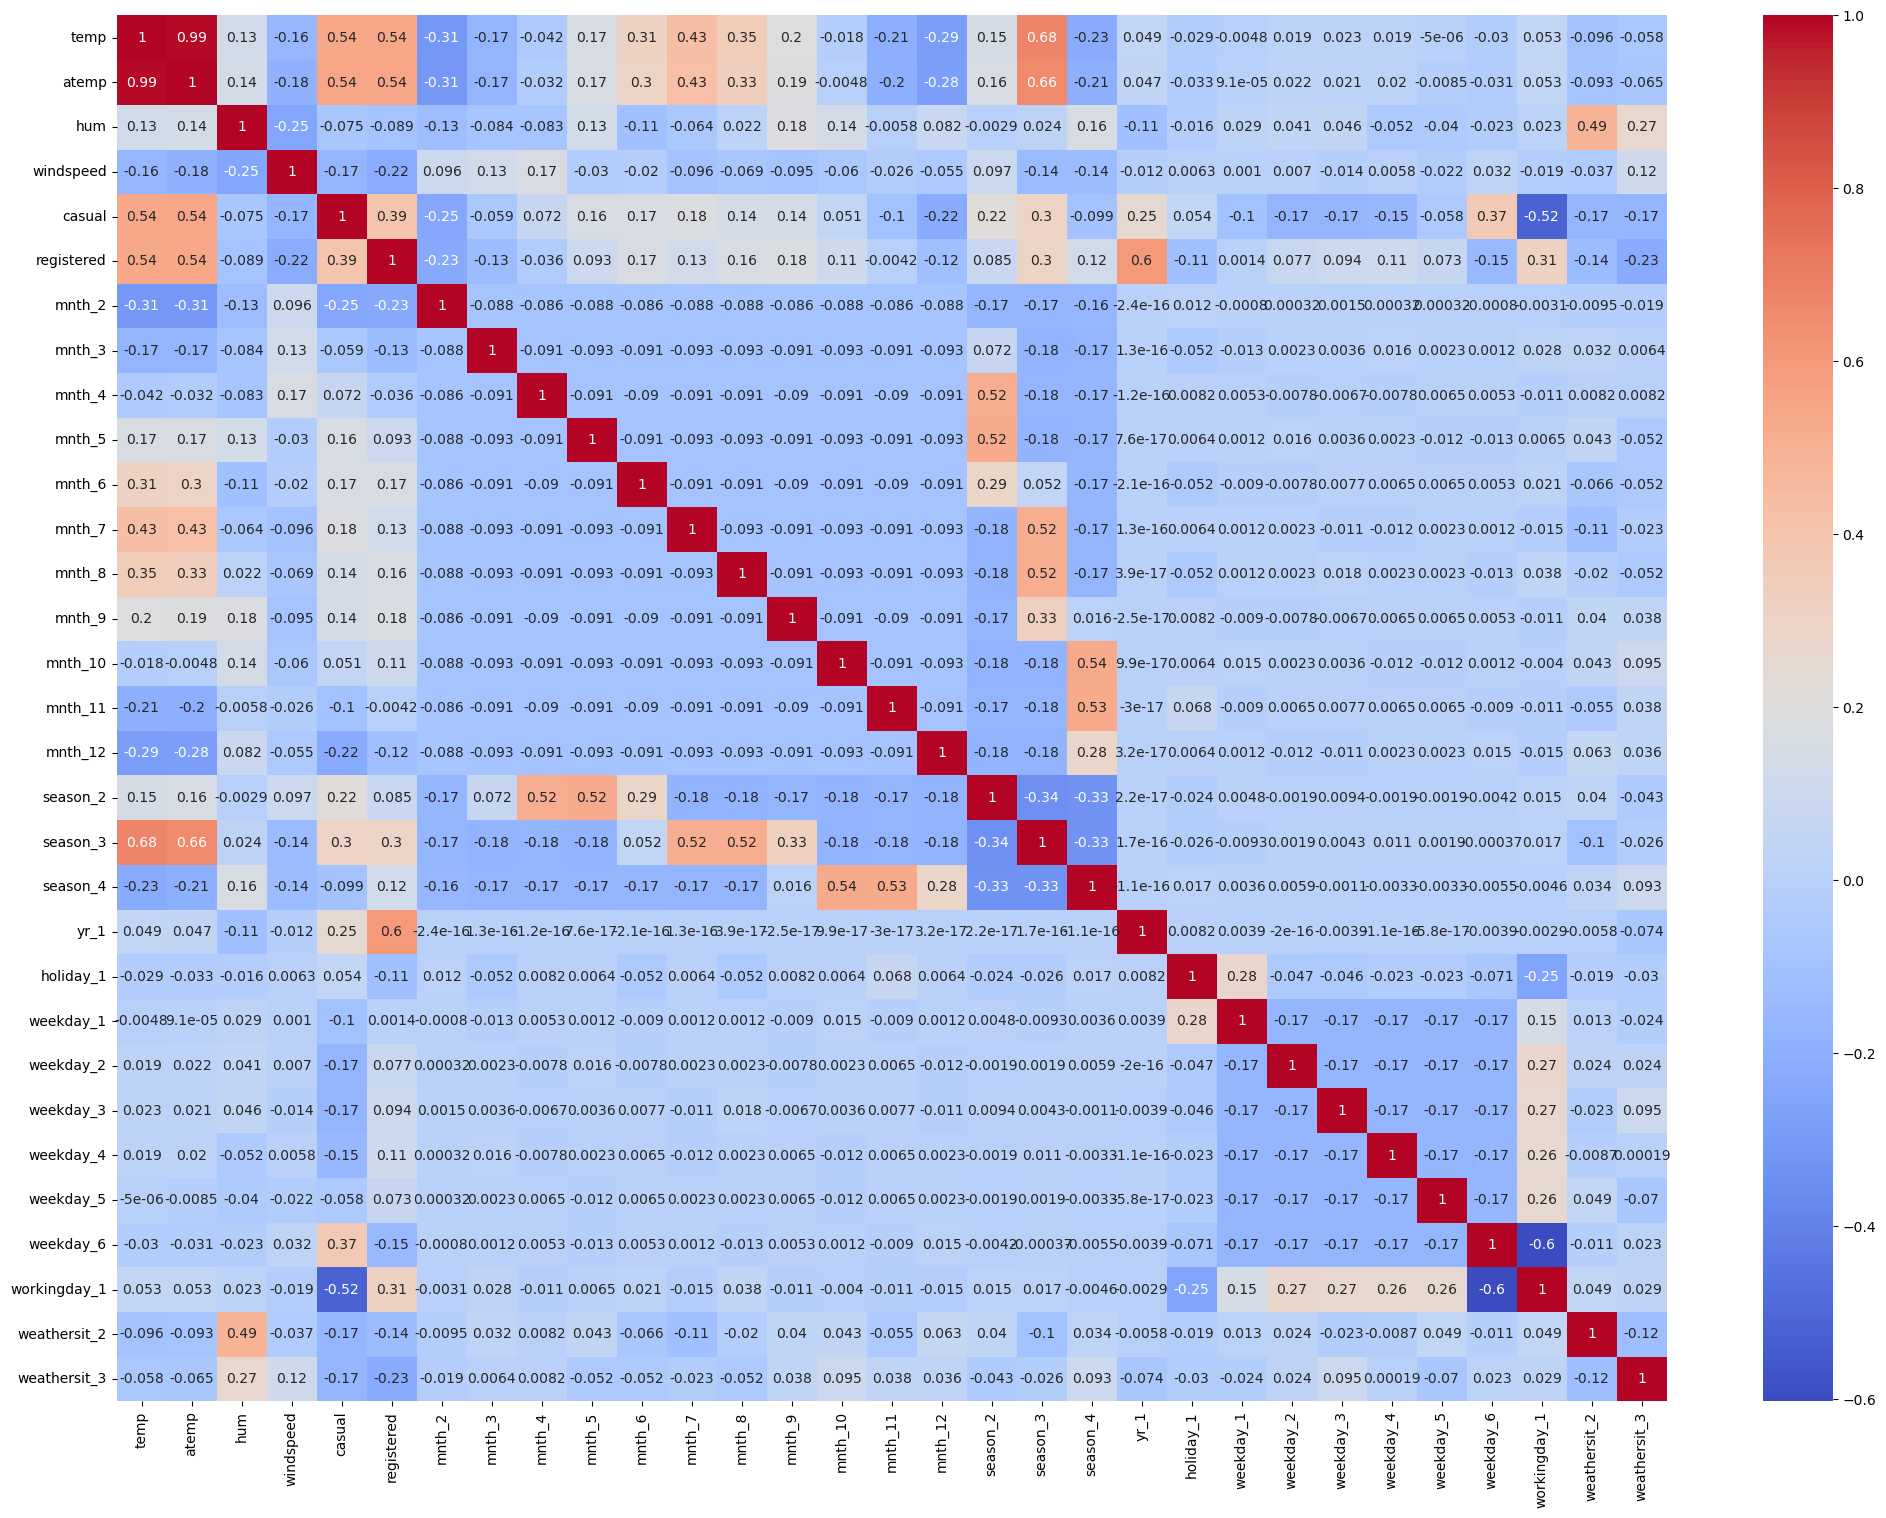

In [46]:
plt.figure(figsize = (25,18))
filtered_corr = X_train.corr()
sns.heatmap(filtered_corr, annot = True, cmap='coolwarm')
plt.show()

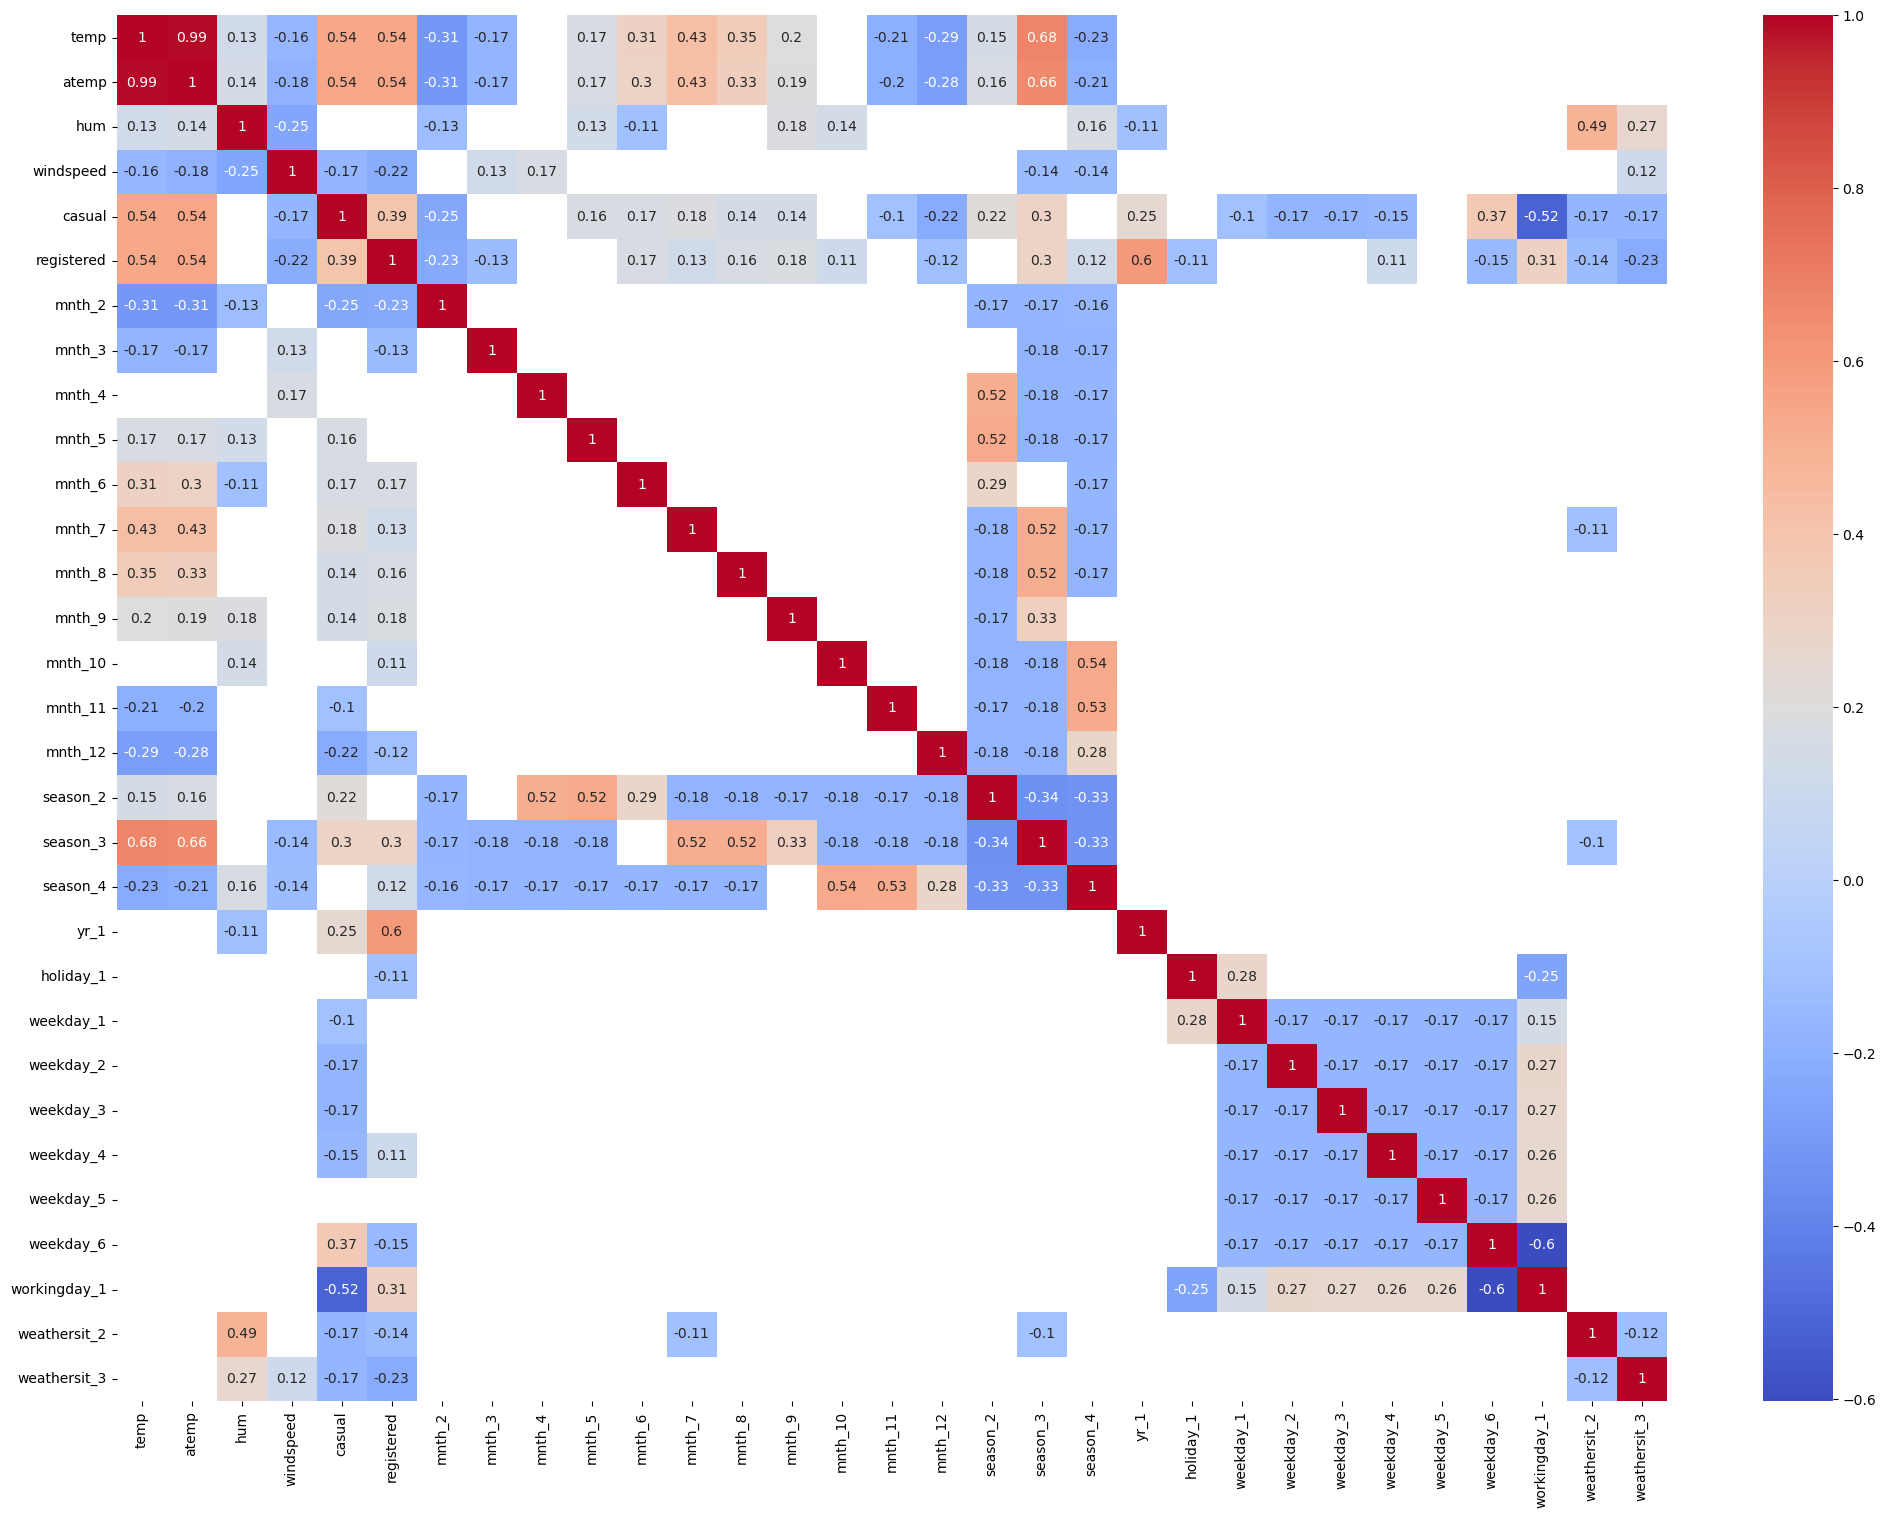

In [47]:
plt.figure(figsize = (25,18))
corr_train = X_train.corr()
# Filter correlations with an absolute value greater than 0.01
filtered_corr = corr_train[(corr_train > 0.1) | (corr_train < -0.1)]
sns.heatmap(filtered_corr, annot = True, cmap='coolwarm')
plt.show()

In [48]:
# temp and atemp have a high correlation (~0.99), so one of these can be removed.
# season_3 and mnth_7 are highly correlated.
# season_4 and mnth_9 also have high correlation.

### ___Step 4 : Building a linear model___

#### ___Writing function for fitting the model and calclate the VIF___

In [51]:
def fit_ols_model(X_train, y_train):
    """
    Fits an OLS regression model to the provided training data.

    Parameters:
    X_train (DataFrame): The training features.
    y_train (Series): The training target variable.

    Returns:
    summary (DataFrame): The summary of the OLS regression results.
    """
    # Add a constant (intercept) to the model
    X_train_lm = sm.add_constant(X_train)
    
    # Fit the OLS model
    lr_model = sm.OLS(y_train, X_train_lm).fit()
    
    # Return the summary of the regression results
    return print(lr_model.summary())

# Example usage
# summary = fit_ols_model(X_train, y_train)
# print(summary)


In [52]:
def calculate_vif(X_train):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in the dataset.

    Parameters:
    X_train (DataFrame): The training features.

    Returns:
    DataFrame: A DataFrame containing features and their corresponding VIF values.
    """
    # Create a DataFrame to store VIF values
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    
    # Calculate VIF for each feature
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round VIF values to 2 decimal places
    vif['VIF'] = round(vif['VIF'], 2)

    # Sorting values
    vif = vif.sort_values(by = 'VIF', ascending = False)
    
    return vif


#### ___Adding all the variables to the model___

In [54]:
# Check all the columns of the dataframe
df_train_col = df_train.columns
df_train_col

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3',
       'season_4', 'yr_1', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [55]:
# Build a linear model
fit_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.971e+30
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:50:43   Log-Likelihood:                 18262.
No. Observations:                 730   AIC:                        -3.646e+04
Df Residuals:                     699   BIC:                        -3.632e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.728e-12   1.09e-12     -2.502   

In [56]:
vif_results = calculate_vif(X_train)
vif_results

,Features,VIF
23,weekday_2,inf
26,weekday_5,inf
22,weekday_1,inf
21,holiday_1,inf
25,weekday_4,inf
24,weekday_3,inf
28,workingday_1,inf
0,temp,663.33
1,atemp,643.56
5,registered,46.89


#### ___Dropping the variable and updating the model___

In [58]:
X_train.drop(['weekday_2', 'weekday_5', 'weekday_1', 'holiday_1', 'weekday_4', 'weekday_3',
              'workingday_1','season_3', 'season_4', 'season_2', 'atemp'], axis =  1, inplace = True)

In [59]:
fit_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.310e+31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                 19005.
No. Observations:                 730   AIC:                        -3.797e+04
Df Residuals:                     709   BIC:                        -3.787e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.501e-12   3.68e-13      6.805   

In [60]:
vif_results = calculate_vif(X_train)
vif_results

,Features,VIF
0,temp,64.99
4,registered,25.19
1,hum,22.55
10,mnth_7,6.58
3,casual,6.29
2,windspeed,6.19
11,mnth_8,5.81
9,mnth_6,5.45
16,yr_1,5.10
12,mnth_9,4.64


#### ___Dropping the variable and updating the model___

In [62]:
X_train.drop(['mnth_2'], axis =  1, inplace = True)

In [63]:
fit_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.660e+31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                 18529.
No. Observations:                 730   AIC:                        -3.702e+04
Df Residuals:                     710   BIC:                        -3.693e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.705e-12   6.85e-13      2.489   

In [64]:
vif_results = calculate_vif(X_train)
vif_results

,Features,VIF
0,temp,62.88
4,registered,24.81
1,hum,21.94
3,casual,6.29
2,windspeed,5.94
9,mnth_7,5.34
15,yr_1,5.07
10,mnth_8,4.61
8,mnth_6,4.35
11,mnth_9,3.57


#### ___Dropping the variable and updating the model___

In [66]:
X_train.drop(['weekday_6'], axis =  1, inplace = True)

In [67]:
fit_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.004e+31
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                 18153.
No. Observations:                 730   AIC:                        -3.627e+04
Df Residuals:                     711   BIC:                        -3.618e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.592e-12   1.14e-12      1.395   

In [68]:
vif_results = calculate_vif(X_train)
vif_results

,Features,VIF
0,temp,62.42
4,registered,24.46
1,hum,21.71
2,windspeed,5.80
9,mnth_7,5.34
15,yr_1,5.07
3,casual,4.80
10,mnth_8,4.61
8,mnth_6,4.34
11,mnth_9,3.57


#### ___Dropping the variable and updating the model___

In [70]:
X_train.drop(['casual', 'registered'], axis = 1, inplace = True) 

In [71]:
#X_train.drop(['hum'], axis = 1, inplace = True)

In [72]:
fit_ols_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.07e-252
Time:                        15:50:44   Log-Likelihood:                -5935.3
No. Observations:                 730   AIC:                         1.190e+04
Df Residuals:                     713   BIC:                         1.198e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1935.1027    232.861      8.310   

In [73]:
vif_results = calculate_vif(X_train)
print(vif_results)

        Features    VIF
0           temp  49.81
1            hum  21.63
2      windspeed   5.68
7         mnth_7   5.30
8         mnth_8   4.52
6         mnth_6   4.21
9         mnth_9   3.29
5         mnth_5   3.11
10       mnth_10   2.29
14  weathersit_2   2.22
4         mnth_4   2.16
13          yr_1   2.02
3         mnth_3   1.78
11       mnth_11   1.68
12       mnth_12   1.61
15  weathersit_3   1.22


### ___Step 5: Residual Analysis of the train data___

In [75]:
y_train.head()

instant
1     985
2     801
3    1349
4    1562
5    1600
Name: cnt, dtype: int64

In [76]:
X_train.head()

,temp,hum,windspeed,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,0,0,0,0,0,0,0,0,0,0,0,1,0
2,14.902598,69.6087,16.652113,0,0,0,0,0,0,0,0,0,0,0,1,0
3,8.050924,43.7273,16.636703,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.200000,59.0435,10.739832,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9.305237,43.6957,12.522300,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# Add a constant (intercept) to the model
X_train_lm = sm.add_constant(X_train)
    
# Fit the OLS model
lr_model = sm.OLS(y_train, X_train_lm).fit()

In [78]:
y_train_price = lr_model.predict(X_train_lm)

Text(0.5, 0, 'Errors')

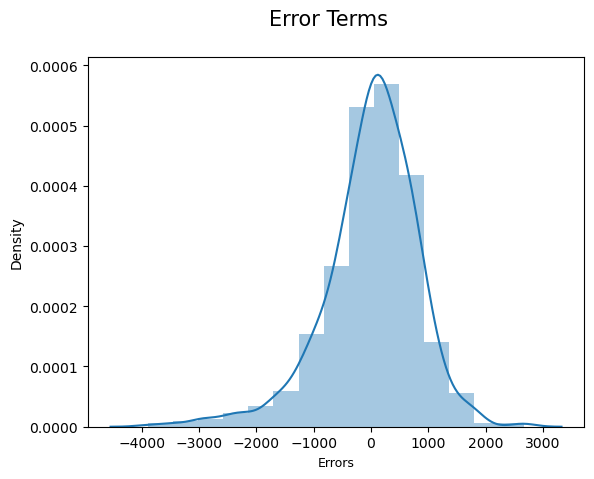

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 9)                         # X-label

### ___Step 6: Making Predictions Using the Final Model___

In [81]:
df_test.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,...,1,1,0,0,0,0,0,0,1,0
536,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,0,...,0,0,0,0,1,0,0,1,1,0
222,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,...,0,0,0,1,0,0,0,1,0,0
153,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [82]:
df_test[num_columns] = scaler.transform(df_test[num_columns])

In [83]:
df_test.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.100457,0.054795,0.091324,...,0.036530,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.319635,0.027397
std,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.301297,0.228100,0.288730,...,0.188034,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.467403,0.163612
min,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### ___Dividing into X_test and y_test___

In [85]:
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
X_test_m2 = sm.add_constant(X_test)

In [87]:
X_test_m2 = X_test_m2.drop(['casual', 'registered', 'weekday_6', 'mnth_2', 'weekday_2', 'weekday_5', 'weekday_1', 
                            'holiday_1', 'weekday_4', 'weekday_3','workingday_1','season_3', 'season_4', 
                            'season_2', 'atemp'], axis = 1)

In [88]:
y_pred_m = lr_model.predict(X_test_m2)

In [89]:
lr_model.params

const           1935.102659
temp             116.325831
hum              -15.931405
windspeed        -49.839083
mnth_3           788.638784
mnth_4          1227.716045
mnth_5          1445.760587
mnth_6          1200.274346
mnth_7           622.163815
mnth_8          1062.600276
mnth_9          1835.384777
mnth_10         1951.325064
mnth_11         1350.019364
mnth_12          837.166848
yr_1            2013.923295
weathersit_2    -412.202121
weathersit_3   -1870.446058
dtype: float64

### ___Step 7: Model Evaluation___

Text(0, 0.5, 'y_pred')

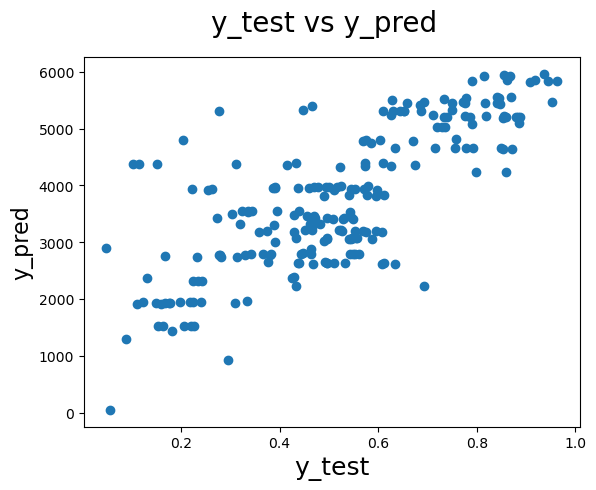

In [163]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  